### Load Data

In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [3]:
X = digits.data
y = digits.target

In [4]:
X.shape

(1797, 64)

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Visualize Data

In [6]:
import matplotlib.pyplot as plt
import numpy as np

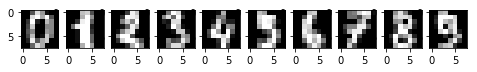

In [7]:
plt.figure(figsize=(8, 8))

for i in range(10):
    
    plt.subplot(1, 10, i + 1)
    
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

plt.show()

### Dimensionality Reduction using PCA

In [8]:
from sklearn.decomposition import PCA

Centering the Data

In [9]:
X_centered = X - X.mean(axis=0)

PCA with 2 components

In [10]:
pca = PCA(n_components=2)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Get new dimensions

In [11]:
X_pca = pca.transform(X_centered)

In [12]:
X_pca.shape

(1797, 2)

Plotting Iris data using 2 PCs

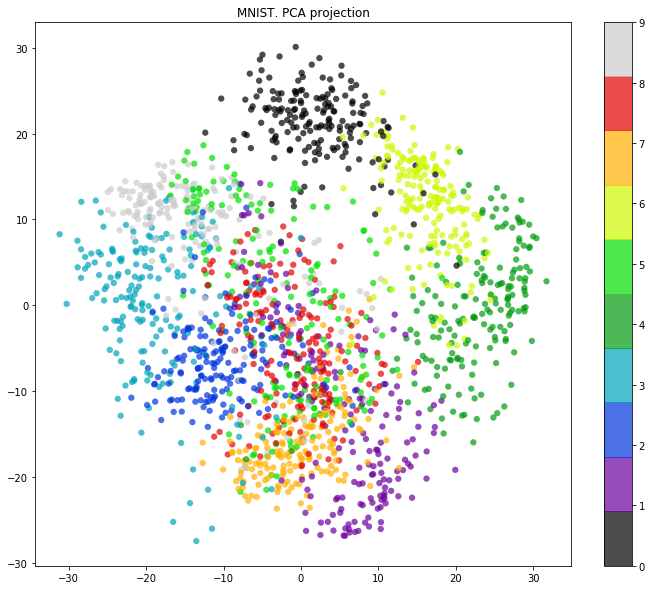

In [13]:
plt.figure(figsize=(12,10))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()

plt.title('MNIST. PCA projection')

plt.show()

### Understanding Variance by Principal Components

Run PCA with all Principal Components

In [14]:
pca = PCA().fit(X_centered)

Visualize Variance by new Dimensions

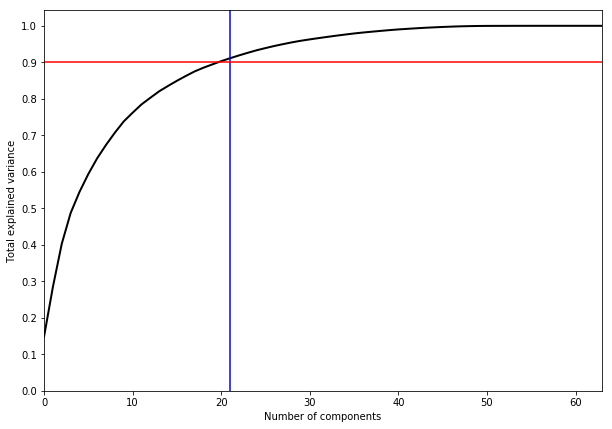

In [15]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axhline(0.9, c='r')

plt.show()